#ConvNet usando Keras
![Kera's logo](https://media-exp1.licdn.com/dms/image/C560BAQG2-bElRVrSqw/company-logo_200_200/0?e=1598486400&v=beta&t=EogZw9bAcv6CtO8oO2eUOSVPgMV0sWQ_FIUkoEmbMkU)

<pre align="center">
imagem original
_| |_
          \   /    Kernel
\/
activation map or feature map
</pre>

##ConvNets
---
##`HYPERPARAMETERS`
>
- Number of layers
- Number of Conv Layers
- Filter sizes
- Values for Stride and Padding
- ...
<br><br>

##`YOLO - You Look Only Once`


##`Regularizações`
>
- Dropout
- L2: Adiciona um termo nos pesos e bias, na função de custo. Adiciona no Gradiente também. Evita que as ativações de neurônios sejam tão altas.
- ResNet




##`LAYERS`
>
- Convolutional layer
- ReLU (rectified Linear Units) layer
- Pooling layer
- Dropout layer
- Network in network layer
<br><br>


##`STRIDE`
> Saltos dados pelo Kernel a cada iteração
<br><br>



##`CONVOLUTIONAL MATRIX (Kernel or K Filter)`
>Cada filtro pode ser visto como um `feature identifier`. `Features` são características como bordas retas, cores simples e curvas. Pode-se ter um filtro de detecção de curvas em imagens, por exemplo.
<br><br>
>Filtro pelo qual a imagem original é sujeita para gerar no final um `feature map` ou `activation map` ou `Convolved Feature` 
<br><br>
>Formado por pesos inicializados aleatoriamente, atualizando-os a cada nova entrada durante o processo de **backpropagation** 
<br><br>
>A pequena região da entrada onde o filtro é aplicado é chamada de `receptive field`
<br><br>
>Quanto maior o número de filtros aplicados a uma imagem, maior é a profundidade do `activation map`, e maior é a quantia de informações que se tem em relação ao volume de entrada.
<br><br>
>Os filtros da primeira camada convolucional são projetados para detectar `low level features`, como arestas e curvas.
<br><br>
> Identificar mãos, patas ou orelhas são `high level features`
<br><br>
>



##`PADDING`
>O padding serve para que as camadas não diminuam muito mais rápido do que é necessário para o aprendizado
<br><br>



##`CONVOLUÇÃO`
> 
<br><br>


##`POOLING`
>Uma camada de Pooling serve para simplificar a informação da camada anterior.
<br><br>
Max Pooling ou Average Pooling 
<br><br>
Serve para diminuir a quantidade de pesos a serem aprendidos e também para evitar `overfitting`.
<br><br>
pooling helps us greatly in detecting features. The goal is to reduce the overall amount of information in an image while maintaining the features that are detected as present.
<br><br>



##DROPOUT LAYER
> This layer “drops out” a random set of activations in that layer by setting them to zero. Simple as that.
<br><br>
>It makes sure that the network isn’t getting too “fitted” to the training data
<br><br>



##´NETWORK in NETWORK´
>Refers to a conv layer where a 1 x 1 size filter is used
<br><br>



##`OVERFITTING`
> when a model is so tuned to the training examples that it is not able to generalize well for the validation and test sets
<br><br>
> Methods to avoid: 
  - Image augmentation 
<br><br>



##OTHER CONCEPTS
> - Data augmentation: Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques.
    - Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more
<br><br>
> - Tranfer Learning: Transfer learning is the process of taking a pre-trained model (the weights and parameters of a network that has been trained on a large dataset by somebody else) and “fine-tuning” the model with your own dataset

#Obtenção dos dados
---

In [34]:
# Baixa as entradas X.npy
!gdown https://drive.google.com/uc?id=1oSRay8phFA91RJoGH0tMmj86LBovKj73

# Baixa as saídas desejadas Y.npy
!gdown https://drive.google.com/uc?id=1_BQLcsgcYYsubtv4M80BVm4BEknrTOr7

Downloading...
From: https://drive.google.com/uc?id=1oSRay8phFA91RJoGH0tMmj86LBovKj73
To: /content/X.npy
33.8MB [00:00, 107MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1_BQLcsgcYYsubtv4M80BVm4BEknrTOr7
To: /content/Y.npy
100% 165k/165k [00:00<00:00, 63.3MB/s]


#Bibliotecas
---

In [0]:
# Importa as principais bibliotecas que usaremos
import numpy as np
from matplotlib import pyplot as plt
import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split

#Leitura dos Dados
---
Os dados já estão normalizados, ou seja, seus valores estão entre 0.0 e 1.0

In [0]:
# Leitura dos dados
X = np.load('X.npy')
Y = np.load('Y.npy')

# Reordena as categorias na ordem correta
# (por motivo que desconheço, os dados
#  originais estavam com as classes fora
#  de ordem -- consistentes e organizadas,
#  mas fora de ordem)
cats = [9,0,7,6,1,8,4,3,2,5]
Y[:,cats] = Y[:,range(10)]

In [37]:
# Aqui conferimos as dimensões dos dados
# dos pares de treinamento
print('X.shape =',X.shape)
print('Y.shape =',Y.shape)

X.shape = (2062, 64, 64)
Y.shape = (2062, 10)


Mostrando 5


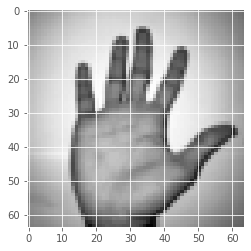

Mostrando 6


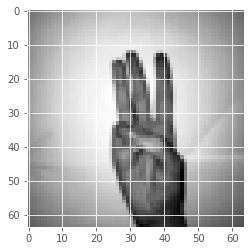

Mostrando 1


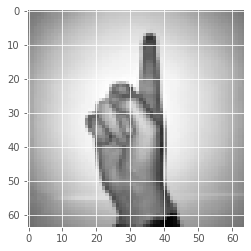

Mostrando 6


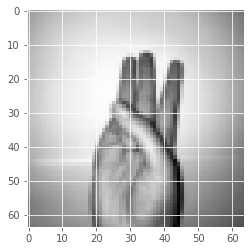

Mostrando 6


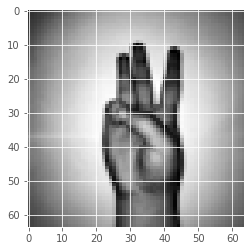

In [38]:
# Total de amostras
total = X.shape[0]

# Mostramos aqui 5 amostras aleatórias
for i in range(5):
  k = np.random.randint(0,total)
  print('Mostrando',np.argmax(Y[k,:]))
  plt.imshow(X[k,:,:], cmap='gray')
  plt.show()

#Preparação dos Dados
---

##Embaralhamento e separação de dados de treinamento e validação
---

- 90% dados de treinamento (X, Y)
- 10% dados de validação (X_test, Y_test)

In [0]:
# Função train_test_split é "uma mão na roda"
# Essa função já embaralha (shuffle) e separa dados
# de treinamento e validação.
X, X_test, Y, Y_test = train_test_split(X, Y, \
                                        test_size=int(total/10), \
                                        random_state=42)

In [40]:
# Vamos conferir como ficaram as dimensões
# dos tensores após a divisão
print('X.shape =',X.shape)
print('Y.shape =',Y.shape)
print('X_test.shape =',X_test.shape)
print('Y_test.shape =',Y_test.shape)

X.shape = (1856, 64, 64)
Y.shape = (1856, 10)
X_test.shape = (206, 64, 64)
Y_test.shape = (206, 10)


##Dimensionamento Tensores
---
4 dimensões: amostra, linhas, colunas e canais de cores

Imagens são usualmente matrizes tridimensionais com altura e largura (de acordo com as dimensões da imagem) e profundidade, determinada pela quantidade de canais de cores. Em geral, as imagens utilizam três canais, RGB, com os valores de cada pixel.


In [0]:
# Aqui fazemos um pequeno ajuste. Acontece
# que o Keras espera que tensores que representam
# datasets de imagens tenham canais de cores. Por
# isso espera 4 dimensões:
#         amostra, linhas, colunas, canais
# Como essas imagens são monocromáticas, precisamos
# adicionar um canal único
X = X.reshape(X.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

In [42]:
# Agora conferimos novamente as dimensões
print('X.shape =',X.shape)
print('Y.shape =',Y.shape)
print('X_test.shape =',X_test.shape)
print('Y_test.shape =',Y_test.shape)

X.shape = (1856, 64, 64, 1)
Y.shape = (1856, 10)
X_test.shape = (206, 64, 64, 1)
Y_test.shape = (206, 10)


#Rede Neural Convolucional
---
O código abaixo definimos uma rede neural do tipo perceptron, com algoritmo de treinamento backpropagation.

In [0]:
totalCNN = 10

CNN = []

for i in range(totalCNN):
  CNN.append(tf.keras.models.Sequential([
        # 1 Camada Convolucional
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                              input_shape=(64, 64, 1)),
        # 2 Camada Convolucional
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        # 3 Camada Max Pooling
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        # Dropout
        tf.keras.layers.Dropout(0.25),
        # Serialização (achatamento)
        tf.keras.layers.Flatten(),
        # Camada escondida de 128 neurônios
        tf.keras.layers.Dense(128, activation='relu'),
        # Dropout
        tf.keras.layers.Dropout(0.25),
        # Camada de saída softmax
        tf.keras.layers.Dense(10, activation='softmax')
      ]))

In [44]:
for i in range(totalCNN):
  CNN[i].summary()
  print("\n\n")

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 57600)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               7372928   
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)             

In [0]:
for i in range(totalCNN):
  CNN[i].compile(
      loss='categorical_crossentropy',
      optimizer=tf.keras.optimizers.Adam(0.001),
      metrics=['accuracy'],
  )

#Rodando o Algoritmo
---
Esta rede neural será treinada em  $10$  épocas

In [46]:
# Treinamento da rede neural

h = []

for i in range(totalCNN):
  print("\n\nCNN", i, "\n========")
  h.append(CNN[i].fit(X, Y, \
          batch_size=32, epochs=10, \
          validation_data=(X_test, Y_test),
          shuffle=True))



CNN 0 ========
Epoch 1/10
58/58 [==============================] - 26s 454ms/step - loss: 2.0332 - accuracy: 0.3173 - val_loss: 1.1700 - val_accuracy: 0.6165
Epoch 2/10
58/58 [==============================] - 26s 449ms/step - loss: 0.9300 - accuracy: 0.6891 - val_loss: 0.7606 - val_accuracy: 0.7573
Epoch 3/10
58/58 [==============================] - 26s 450ms/step - loss: 0.5909 - accuracy: 0.8195 - val_loss: 0.5891 - val_accuracy: 0.7913
Epoch 4/10
58/58 [==============================] - 27s 457ms/step - loss: 0.4040 - accuracy: 0.8658 - val_loss: 0.5633 - val_accuracy: 0.8058
Epoch 5/10
58/58 [==============================] - 26s 449ms/step - loss: 0.2691 - accuracy: 0.9138 - val_loss: 0.4810 - val_accuracy: 0.8252
Epoch 6/10
58/58 [==============================] - 26s 450ms/step - loss: 0.1972 - accuracy: 0.9445 - val_loss: 0.5128 - val_accuracy: 0.8010
Epoch 7/10
58/58 [==============================] - 26s 449ms/step - loss: 0.1482 - accuracy: 0.9515 - val_loss: 0.4494 - val

#Avaliação dos Resultados
---

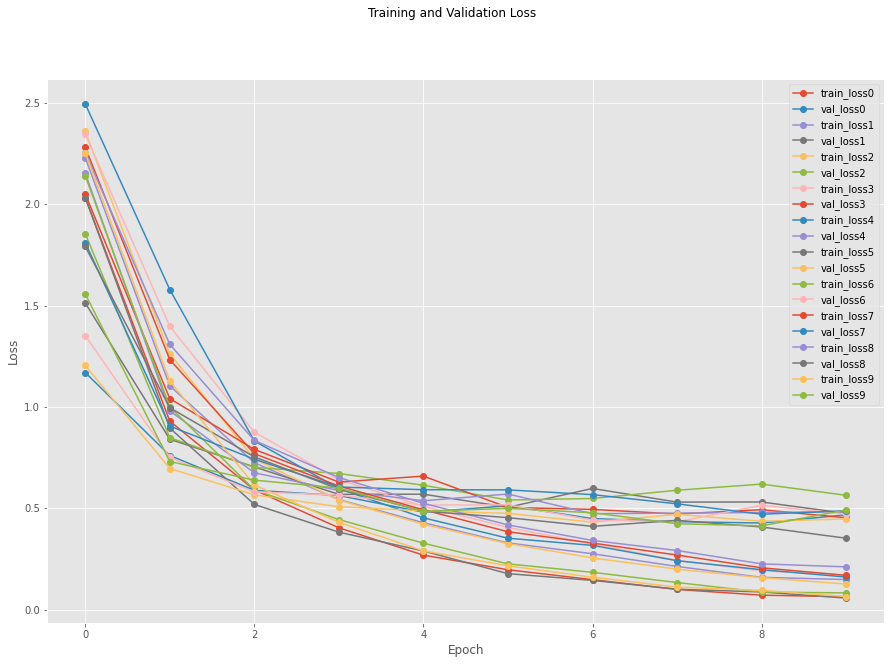

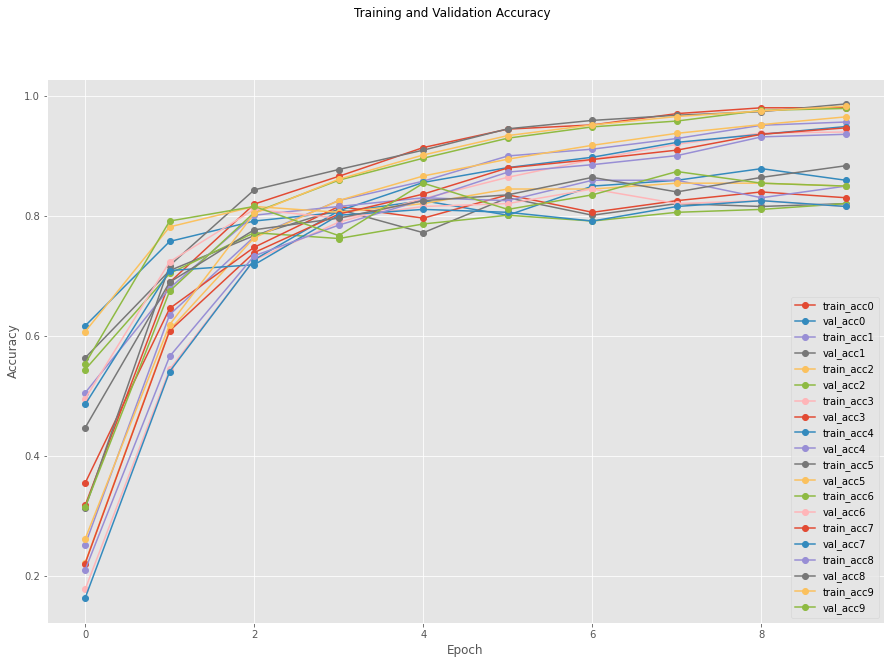

In [47]:
from matplotlib import pyplot as plt

# Plotamos o gráfico da evolução do erro
# no tempo. Esta é a chamada "curva de
# aprendizagem"

# Training and validation data loss
plt.style.use("ggplot")
plt.figure(figsize=(15,10))
for i in range(totalCNN):
  plt.plot(h[i].history['loss'], '-o', label=("train_loss"+str(i)))
  plt.plot(h[i].history['val_loss'], '-o', label=("val_loss"+str(i)))
plt.suptitle('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Training and validation data accuracy
plt.style.use("ggplot")
plt.figure(figsize=(15,10))
for i in range(totalCNN):
  plt.plot(h[i].history['accuracy'], '-o', label=("train_acc"+str(i)))
  plt.plot(h[i].history['val_accuracy'], '-o', label=("val_acc"+str(i)))
plt.suptitle('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Avaliação da performance nos dados de treinamento e dados de validação

In [48]:
for i in range(totalCNN):
  loss, accuracy = CNN[i].evaluate(X, Y, verbose=0)

  print('Taxa de acerto nos dados de treinamento CNN', str(i), ':\t', \
        100*accuracy, '%')

  loss, accuracy = CNN[i].evaluate(X_test, Y_test, verbose=0)

  print('Taxa de acerto nos dados de validação CNN', str(i), ':\t', \
        100*accuracy, '%\n')

Taxa de acerto nos dados de treinamento CNN 0 :	 99.94612336158752 %
Taxa de acerto nos dados de validação CNN 0 :	 85.92233061790466 %

Taxa de acerto nos dados de treinamento CNN 1 :	 98.97629022598267 %
Taxa de acerto nos dados de validação CNN 1 :	 82.03883767127991 %

Taxa de acerto nos dados de treinamento CNN 2 :	 98.97629022598267 %
Taxa de acerto nos dados de validação CNN 2 :	 82.03883767127991 %

Taxa de acerto nos dados de treinamento CNN 3 :	 99.56896305084229 %
Taxa de acerto nos dados de validação CNN 3 :	 83.00970792770386 %

Taxa de acerto nos dados de treinamento CNN 4 :	 99.13793206214905 %
Taxa de acerto nos dados de validação CNN 4 :	 84.95145440101624 %

Taxa de acerto nos dados de treinamento CNN 5 :	 99.94612336158752 %
Taxa de acerto nos dados de validação CNN 5 :	 84.95145440101624 %

Taxa de acerto nos dados de treinamento CNN 6 :	 99.8383641242981 %
Taxa de acerto nos dados de validação CNN 6 :	 81.5533995628357 %

Taxa de acerto nos dados de treinamento CNN

		Prediction CNN 0



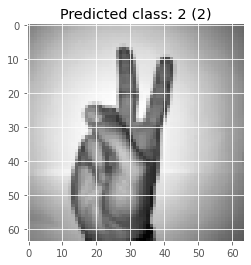

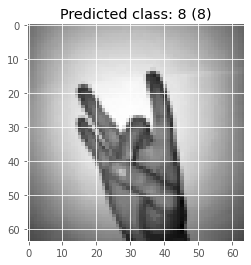

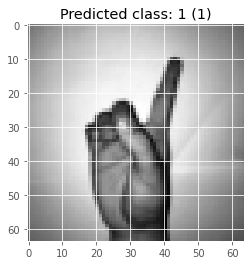

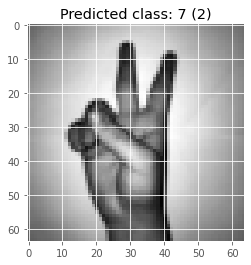

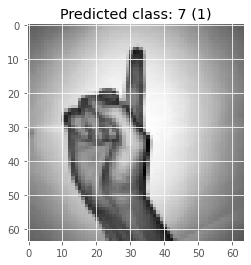

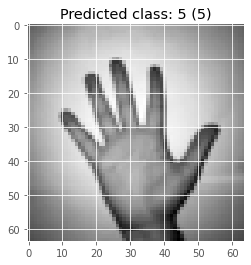

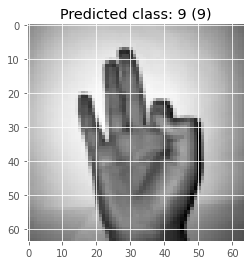

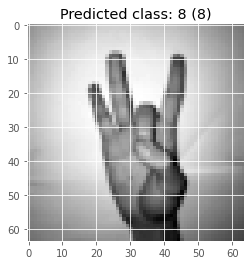

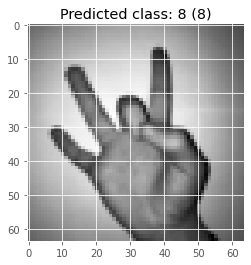

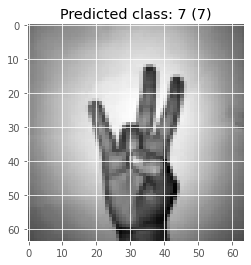







		Prediction CNN 1



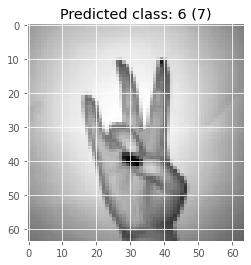

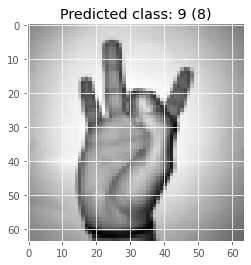

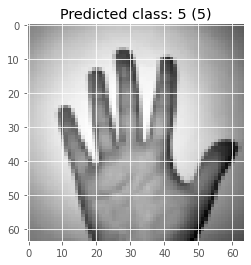

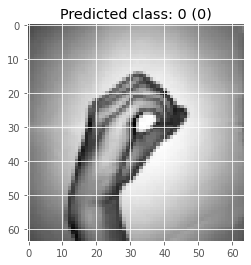

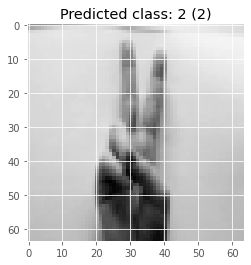

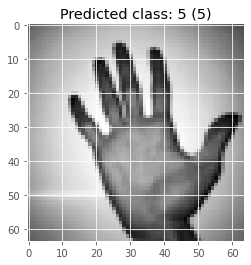

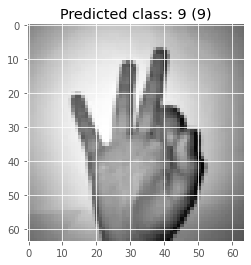

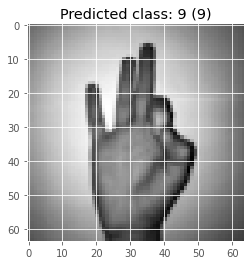

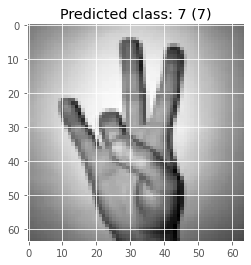

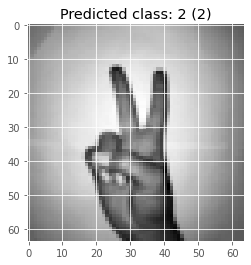







		Prediction CNN 2



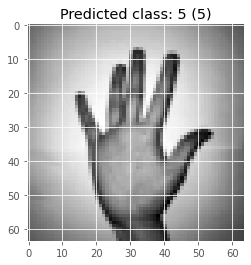

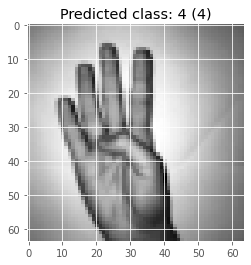

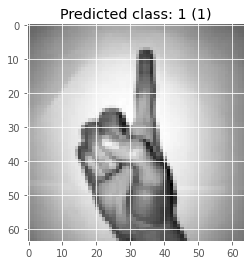

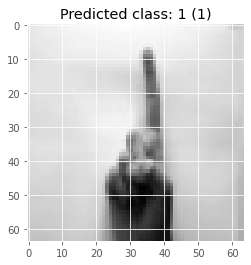

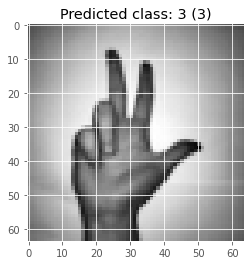

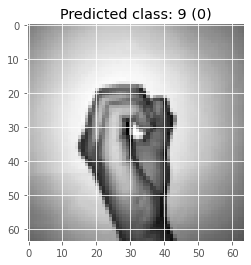

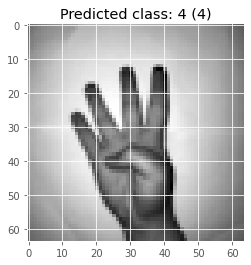

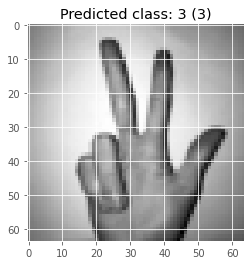

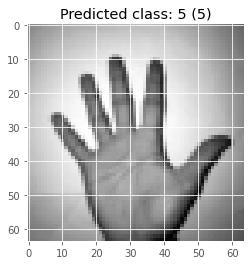

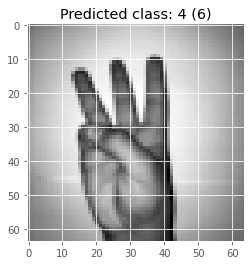







		Prediction CNN 3



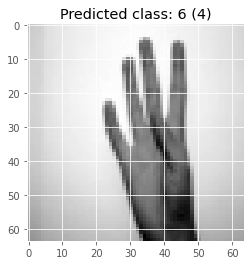

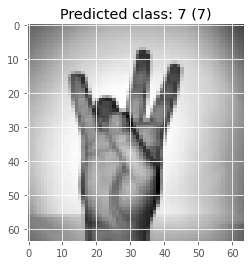

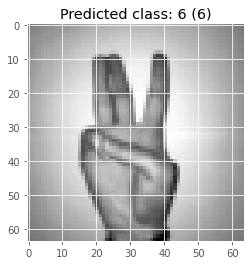

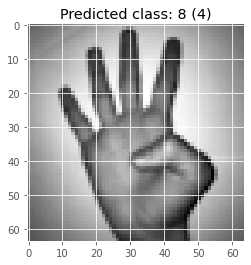

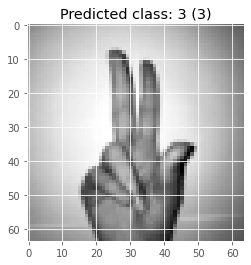

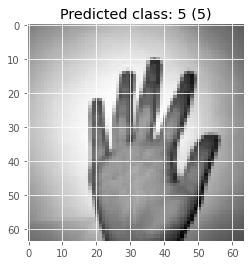

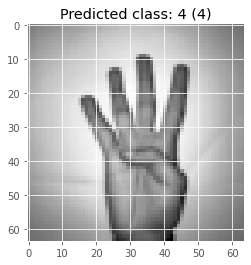

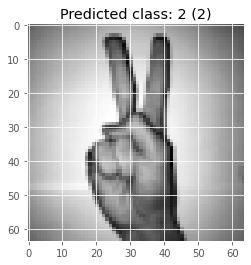

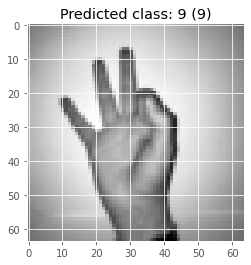

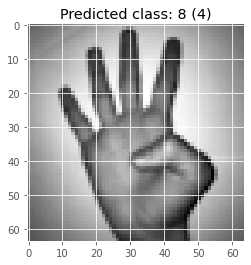







		Prediction CNN 4



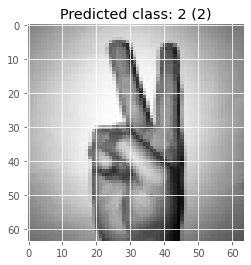

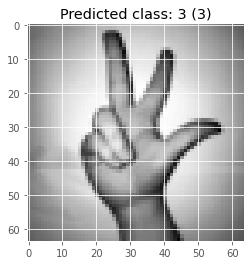

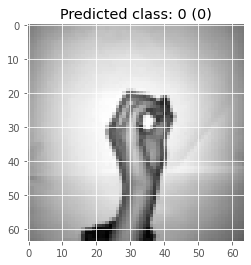

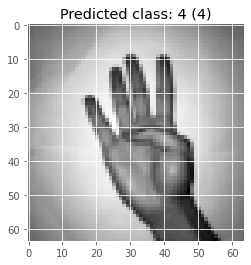

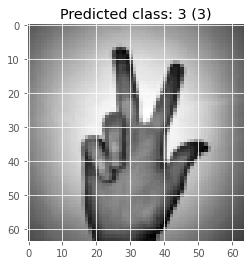

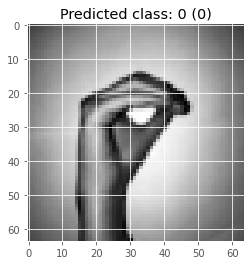

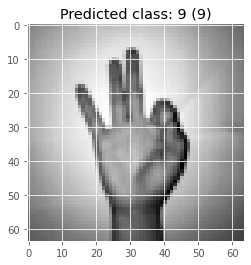

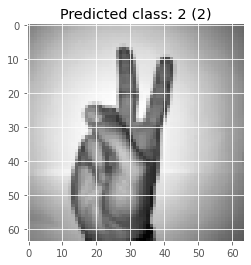

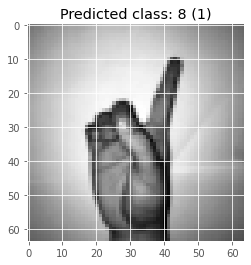

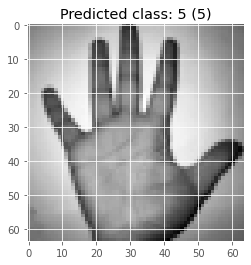







		Prediction CNN 5



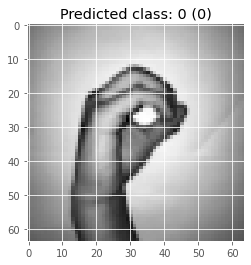

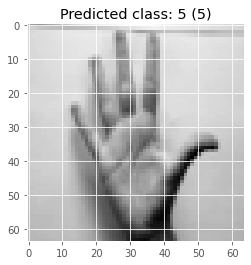

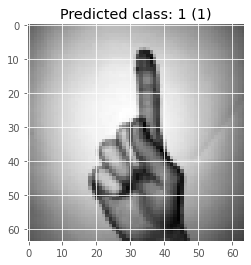

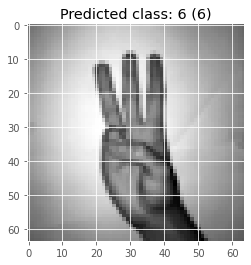

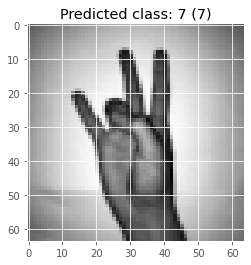

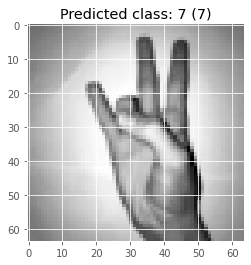

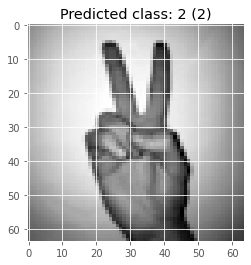

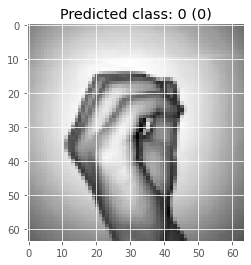

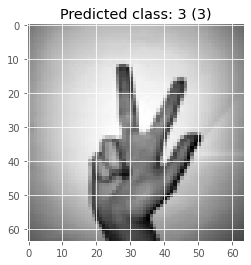

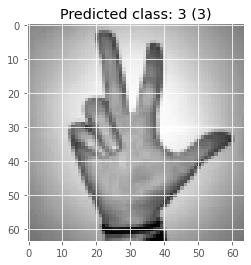







		Prediction CNN 6



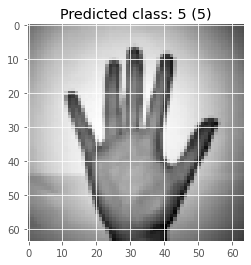

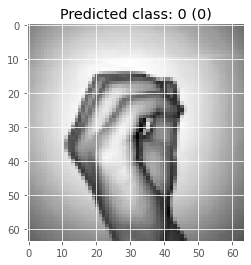

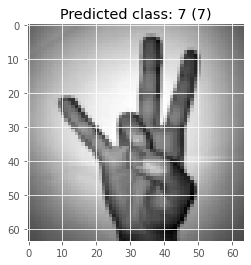

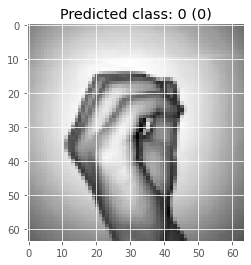

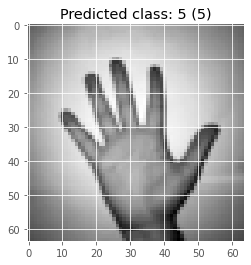

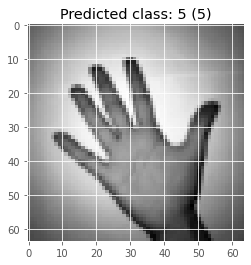

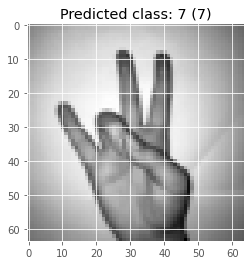

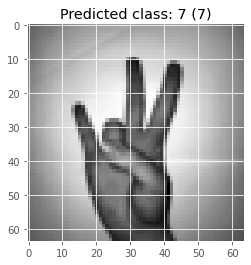

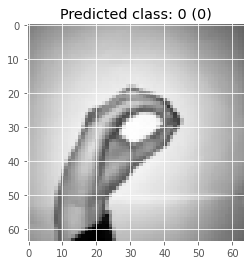

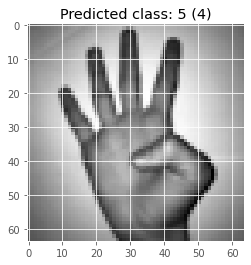







		Prediction CNN 7



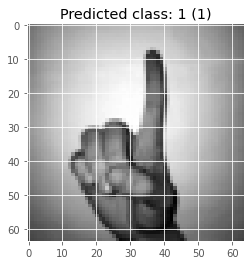

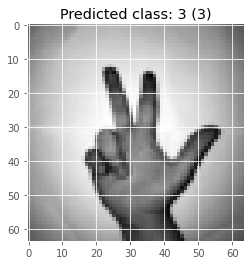

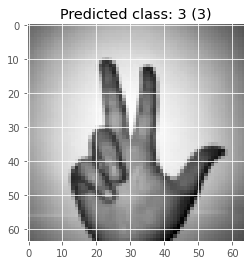

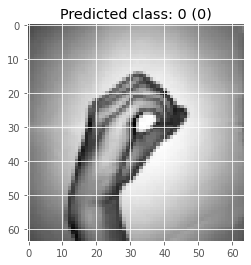

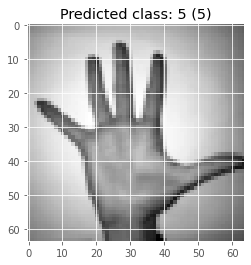

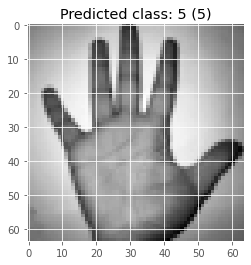

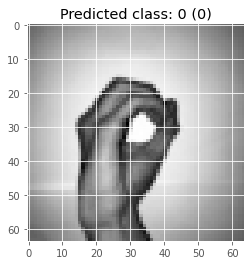

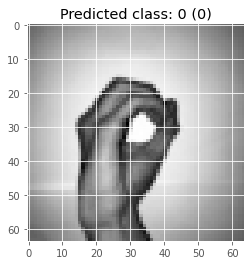

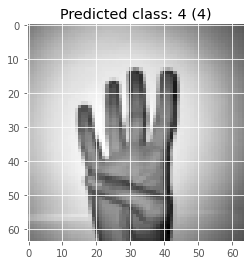

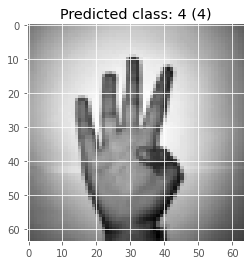







		Prediction CNN 8



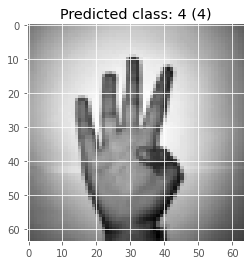

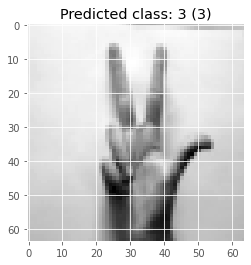

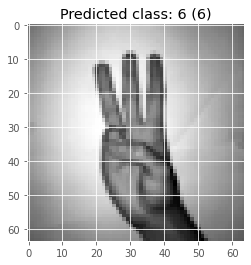

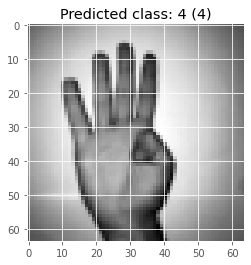

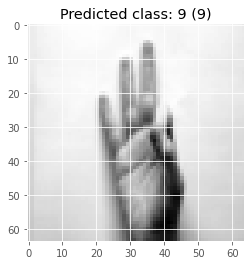

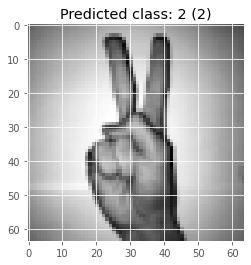

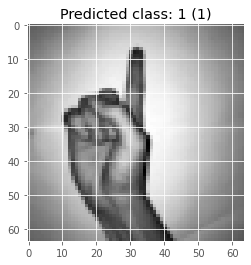

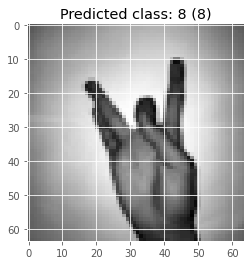

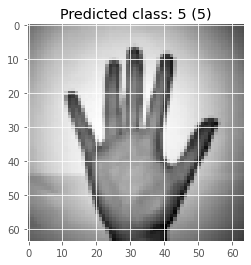

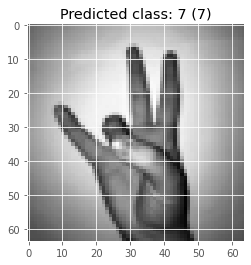







		Prediction CNN 9



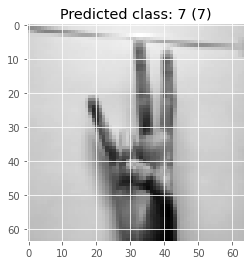

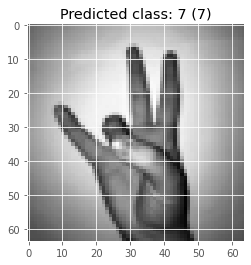

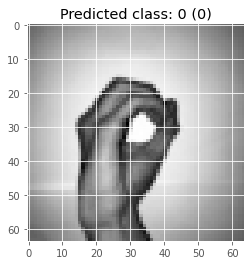

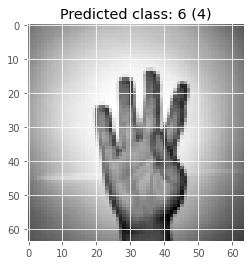

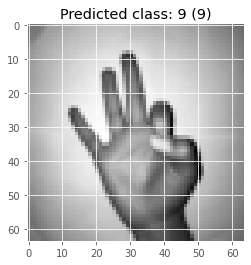

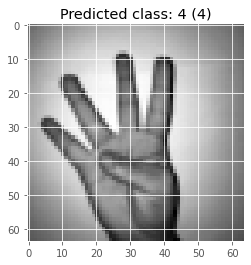

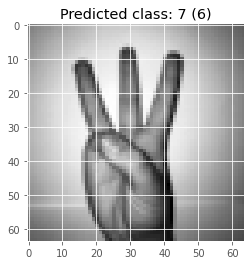

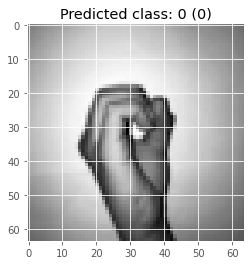

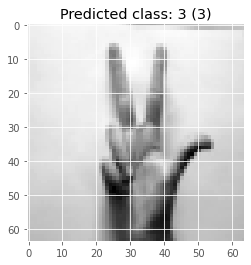

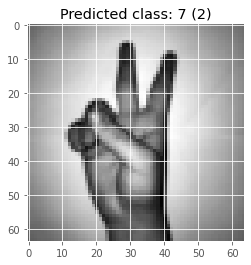

In [49]:
# Total de amostras
total = X_test.shape[0]

# Estimativas
for i in range(totalCNN):
  print('===================================================')
  print("\t\tPrediction CNN", i)
  print('===================================================\n')
  predictions = CNN[i].predict(X_test, batch_size=32)

  for i in range(10):
    n = np.random.randint(0, total)
    img = np.reshape(X_test[n], (64,64))
    plt.imshow(img , cmap='gray')
    plt.title("Predicted class: " + str(np.argmax(predictions[n])) + " (" + str(np.argmax(Y_test[n,:])) + ")")
    plt.show()
  print("\n\n\n\n\n")